**READING THE DATASET**

In [10]:
# LOAD THE LIBRARIES
import pandas as pd
import numpy as np
#import pandas_profiling as pp
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

# Importing all necessary libraries

from math import sqrt
import xgboost as xgb
import lightgbm as lgb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from functools import partial
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from bayes_opt import BayesianOptimization
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold
from pprint import pprint

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [11]:
train = pd.read_csv('./ReNew_Participants_Data/train.csv')
test = pd.read_csv('./ReNew_Participants_Data/test.csv')

print("The Wind Turbine training dataset has", train.shape[0], "records, each with",train.shape[1],"attributes.")
print("The Wind Turbine test dataset has", test.shape[0], "records, each with",test.shape[1],"attributes.")

train.head()

The Wind Turbine training dataset has 909604 records, each with 16 attributes.
The Wind Turbine test dataset has 303202 records, each with 14 attributes.


,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [12]:
test.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,472.577255,478.373881,12.306687,965.077563,51.796728,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864276,189.731988,236.053320,261.672180,7.822326,0.561465,Turbine_158


In [13]:
# We will change the Timestamp columns
train['timestamp'] = pd.to_datetime(train['timestamp'])
train.drop(['timestamp', 'turbine_id'],axis=1,inplace=True)
test.drop('turbine_id', axis=1, inplace=True)

In [14]:
# Check for null
train.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
Target                                    0
dtype: int64

There are no NULL values to deal with.

In [15]:
""" # Creating a Numerical dataframe and omitting Timestamp column
train_num = train.select_dtypes(["float64"])
train_cat = train.select_dtypes(["object"])
train_num.head() """

' # Creating a Numerical dataframe and omitting Timestamp column\ntrain_num = train.select_dtypes(["float64"])\ntrain_cat = train.select_dtypes(["object"])\ntrain_num.head() '

In [16]:
""" train_cat.head() """

' train_cat.head() '

In [17]:
""" from sklearn.preprocessing import LabelEncoder
# Label Encoding the categorical columns
le = LabelEncoder()

# Encode turbine_id
le.fit(train_cat.turbine_id)
train_cat.turbine_id = le.transform(train_cat.turbine_id)

train_cat.head() """

' from sklearn.preprocessing import LabelEncoder\n# Label Encoding the categorical columns\nle = LabelEncoder()\n\n# Encode turbine_id\nle.fit(train_cat.turbine_id)\ntrain_cat.turbine_id = le.transform(train_cat.turbine_id)\n\ntrain_cat.head() '

In [18]:
train.skew(axis=0)

active_power_calculated_by_converter      1.094894
active_power_raw                          1.079560
ambient_temperature                      -0.405606
generator_speed                          -0.432870
generator_winding_temp_max                0.482791
grid_power10min_average                   1.008062
nc1_inside_temp                           0.040530
nacelle_temp                             -0.427542
reactice_power_calculated_by_converter    1.731298
reactive_power                            1.638332
wind_direction_raw                       -0.363971
wind_speed_raw                            0.718327
wind_speed_turbulence                     2.205472
Target                                    0.705359
dtype: float64

**DATA VISUALIZATION**

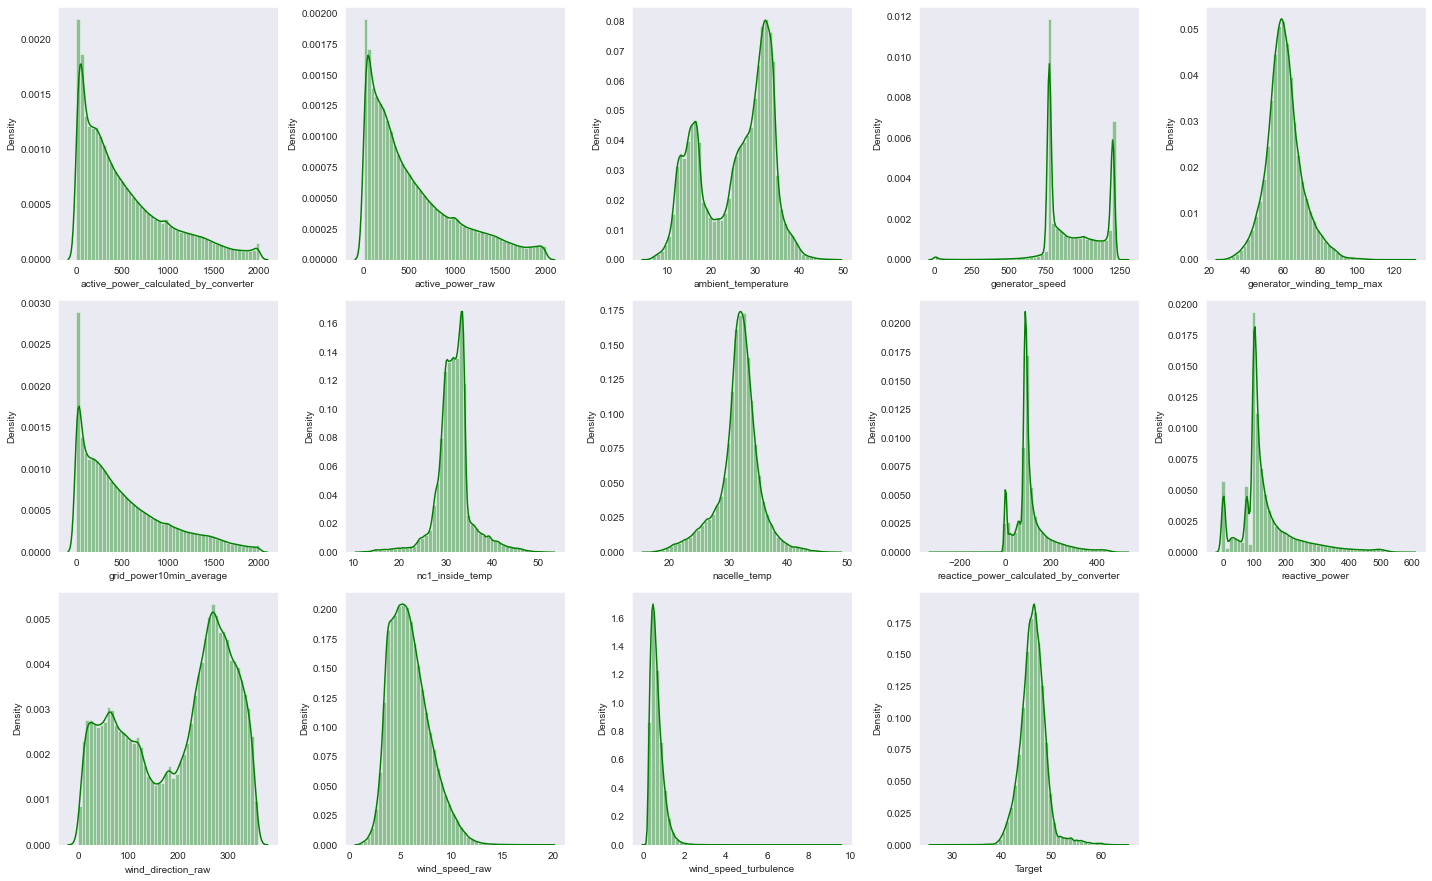

In [19]:
# Plotting the distributions of the numerical features
plt.figure(figsize=(20,16))

for i, col in enumerate(list(train)):
    plt.subplot(4,5,i+1)
    sns.distplot(train[col], color='g', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

Some are normally distributed; and some left skewed. The target variable ('Target') is normally distributed. Let's apply a power transformer on the data and see how that affects the distributions.

In [20]:
# Applying normalization & transformation to see if it reduces the impact of outliers
from sklearn.preprocessing import PowerTransformer

# Init
pt = PowerTransformer()

cols = train.columns[train.columns != 'Target']
train[cols] = pt.fit_transform(train[cols])
train.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
0,0.804489,0.812812,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.491302,0.492280,0.777760,0.682465,-0.181267,47.582787
1,0.105511,0.091834,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,-0.182065,-0.061024,0.949197,-0.090553,-0.532215,46.070328
2,1.393659,1.403914,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,1.480174,1.499626,-1.083126,1.115842,0.137915,39.989236
3,-1.228872,-1.356495,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-0.516278,-0.557574,-1.060222,-0.938929,0.609483,46.056587
4,0.451064,0.466452,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,0.439360,0.439541,1.078729,0.359877,-1.226905,54.346095


In [21]:
train.skew(axis=0)

active_power_calculated_by_converter     -0.110339
active_power_raw                         -0.097555
ambient_temperature                      -0.232208
generator_speed                          -0.023327
generator_winding_temp_max                0.016822
grid_power10min_average                  -0.166983
nc1_inside_temp                           0.202477
nacelle_temp                              0.119152
reactice_power_calculated_by_converter   -1.465851
reactive_power                            0.100957
wind_direction_raw                       -0.406996
wind_speed_raw                           -0.001060
wind_speed_turbulence                     0.046962
Target                                    0.705359
dtype: float64

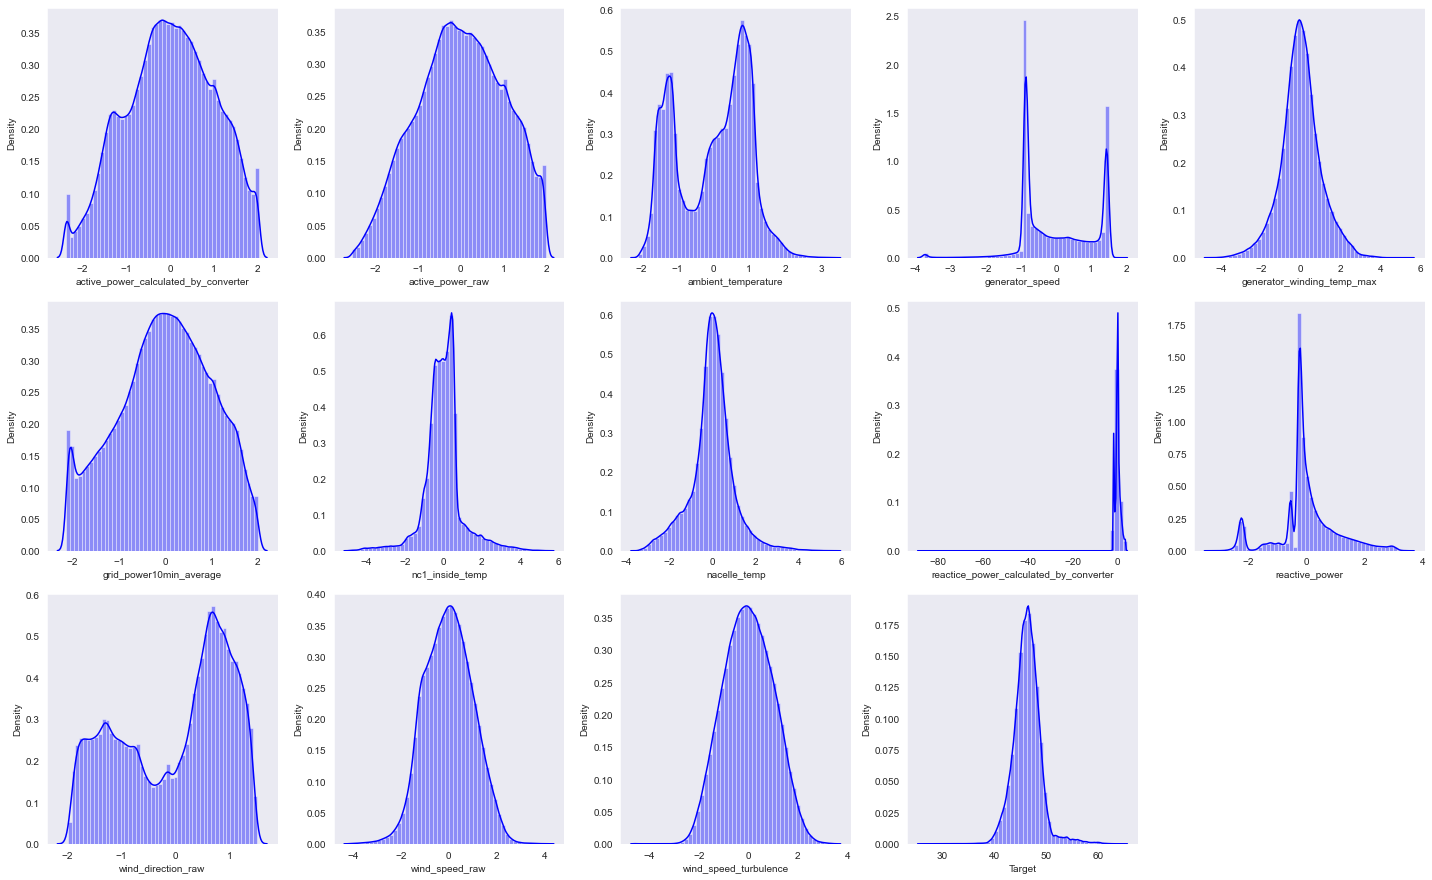

In [23]:
# Plotting the distributions of the numerical features after applying log transformation
plt.figure(figsize=(20,16))

for i, col in enumerate(list(train)):
    plt.subplot(4,5,i+1)
    sns.distplot(train[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

The Power transformer has improved the distribution. There are some outliners for the " reactice_power_calculated_by_converter" feature; we will see how to treat that in later stages. But for now this transformation can be applied and taken forward.

In [25]:
t_cols = test.columns
test[t_cols] = pt.fit_transform(test[t_cols])
test.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,-1.772346,-1.778495,2.048489,-2.497042,-0.305111,-1.009614,4.486108,4.576369,-1.851679,-2.224844,-0.389183,-2.254006,0.698795
1,0.220378,0.215853,-1.566007,0.144343,-0.922176,0.248735,-1.094694,-2.018279,-0.079325,0.003569,-1.373470,0.133691,-0.178899
2,0.168378,0.158694,0.390471,0.053440,0.025699,0.039673,1.971111,1.165867,-0.160583,-0.021594,0.255665,0.146219,-0.316702
3,-0.327380,-0.365622,0.115958,-0.688208,-0.480182,-0.569982,-0.588290,-0.204204,-0.174214,-0.164993,-0.143695,-0.716170,-0.633185
4,1.255409,1.263624,0.818413,1.446851,0.704211,1.169394,0.031213,-0.285226,1.048744,1.134835,0.601470,1.009043,-0.104702


**FEATURE SELECTION**

In [26]:
X = train.drop('Target', axis=1)
y = train['Target']

In [27]:
X.shape[1]

13

In [28]:
X.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.804489,0.812812,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.491302,0.492280,0.777760,0.682465,-0.181267
1,0.105511,0.091834,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,-0.182065,-0.061024,0.949197,-0.090553,-0.532215
2,1.393659,1.403914,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,1.480174,1.499626,-1.083126,1.115842,0.137915
3,-1.228872,-1.356495,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-0.516278,-0.557574,-1.060222,-0.938929,0.609483
4,0.451064,0.466452,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,0.439360,0.439541,1.078729,0.359877,-1.226905


**Correlation check for multi-collinearity**

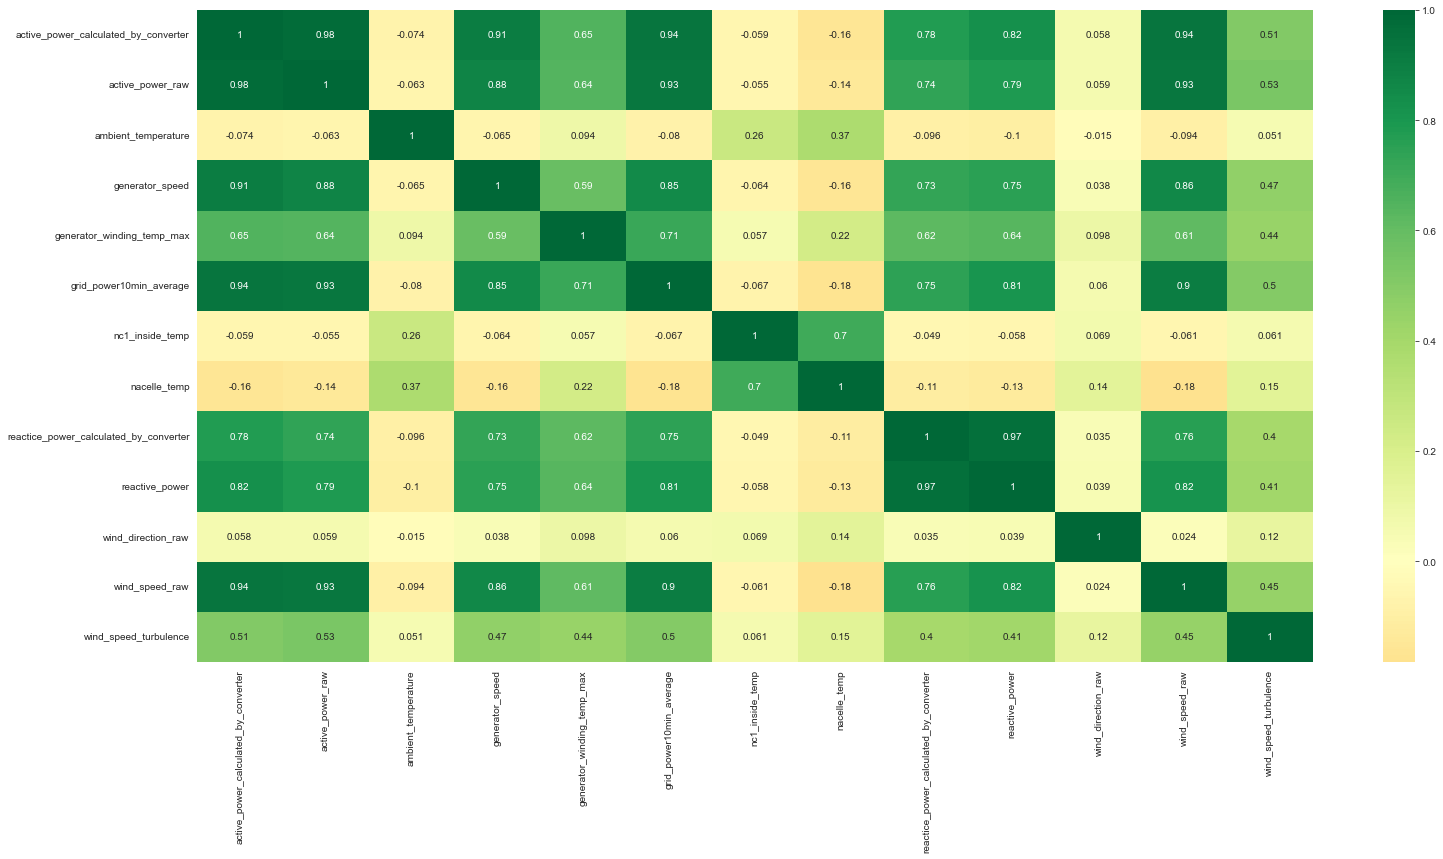

In [29]:
# Plotting a heatmap plot

from turtle import color
plt.figure(figsize=(25,12))
p = sns.heatmap(data=X.corr(method='pearson'), cmap='RdYlGn', annot=True, center=0)

**Correlation of Independent Variables**

Based on the coefficient values some of the independent variables are highly correlated to each other (value >=0.8). This means we may need to drop one of these to ensure we do not overfit the model. We will analyze further with some other methods (VIF, Feature Selection and Embedded methods) to come to an optimal set of features.

* active_power_calculated_by_converter & active_power_raw 
* active_power_calculated_by_converter & wind_speed_raw
* active_power_calculated_by_converter & grid_power10min_average
* active_power_raw & wind_speed_raw
* active_power_raw & grid_power10min_average
* generator_speed & active_power_calculated_by_converter  
* reactice_power_calculated_by_converter & reactive_power

In [30]:
X.corrwith(y)

active_power_calculated_by_converter     -0.047809
active_power_raw                         -0.043599
ambient_temperature                       0.427182
generator_speed                          -0.042325
generator_winding_temp_max                0.300506
grid_power10min_average                  -0.054231
nc1_inside_temp                           0.201047
nacelle_temp                              0.503090
reactice_power_calculated_by_converter   -0.040941
reactive_power                           -0.045422
wind_direction_raw                        0.070613
wind_speed_raw                           -0.071601
wind_speed_turbulence                     0.081114
dtype: float64

**VIF Check**

In [31]:
# Import VIF library for multi-collinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calc_vif(dataframe):

    # calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = dataframe.columns
    vif["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif = vif.sort_values(ascending=False, by="VIF")
    return(vif)

calc_vif(X) 

,Variables,VIF
0,active_power_calculated_by_converter,38.181699
1,active_power_raw,26.281814
9,reactive_power,21.902869
8,reactice_power_calculated_by_converter,17.417872
5,grid_power10min_average,12.335362
11,wind_speed_raw,10.142883
3,generator_speed,5.853446
7,nacelle_temp,3.367055
4,generator_winding_temp_max,3.303477
6,nc1_inside_temp,2.237131


* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [32]:
X = X.drop(['active_power_calculated_by_converter','active_power_raw', 'reactive_power', 'reactice_power_calculated_by_converter'], axis=1)
calc_vif(X)

,Variables,VIF
3,grid_power10min_average,9.079282
7,wind_speed_raw,6.630188
1,generator_speed,4.340181
5,nacelle_temp,3.317795
2,generator_winding_temp_max,3.055848
4,nc1_inside_temp,2.220333
8,wind_speed_turbulence,1.508332
0,ambient_temperature,1.168021
6,wind_direction_raw,1.045255


In [33]:
X.head()

,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.777760,0.682465,-0.181267
1,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,0.949197,-0.090553,-0.532215
2,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,-1.083126,1.115842,0.137915
3,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-1.060222,-0.938929,0.609483
4,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,1.078729,0.359877,-1.226905


**Wrapper Methods**

* Sequential Feature Selector - Forward Selection 
* Backward Elimination - Recursive Feature Elimination (RFE)
* Stepwise Selection: Bi-directional with a combination of Forward Selection & Backward Elimination

**Forward Selection Method - SFS() from Mlxtend**

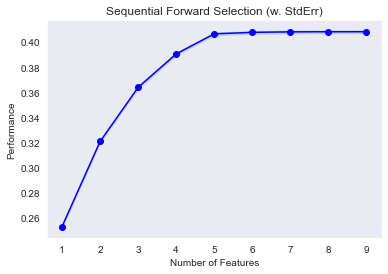

In [34]:
# Sequential Feature Selection (SFS)
sfs = SFS(LinearRegression(), k_features=9, forward=True, floating=False, scoring='r2', cv=5)
sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

We can see that the performance fairly remains same after k_features reaches 6. 

In [35]:
sfs = SFS(LinearRegression(), k_features=6, forward=True, floating=False, scoring='r2', cv=5)
sfs.fit(X, y)
#sfs.subsets_[6]['feature_names']
selected_1 = pd.DataFrame({'Feature' : sfs.k_feature_names_, 'Score' : sfs.k_score_})
print(selected_1)

                      Feature     Score
0         ambient_temperature  0.407721
1  generator_winding_temp_max  0.407721
2     grid_power10min_average  0.407721
3             nc1_inside_temp  0.407721
4                nacelle_temp  0.407721
5       wind_speed_turbulence  0.407721


**SelectKBest with Pearson's f_regression**

In [36]:
best_features = SelectKBest(score_func=f_regression, k='all')
fit = best_features.fit(X,y)

feat_scores = pd.DataFrame({'Feature': X.columns, 'Pearsons Score' : fit.scores_})
print(feat_scores.sort_values(by=['Pearsons Score'], ascending=False))

                      Feature  Pearsons Score
5                nacelle_temp   308233.310336
0         ambient_temperature   203039.981737
2  generator_winding_temp_max    90294.303811
4             nc1_inside_temp    38314.508929
8       wind_speed_turbulence     6024.374809
7              wind_speed_raw     4687.293770
6          wind_direction_raw     4558.237670
3     grid_power10min_average     2682.990855
1             generator_speed     1632.366452


In [37]:
selected_2 = feat_scores.nlargest(6, 'Pearsons Score')
print(selected_2)

                      Feature  Pearsons Score
5                nacelle_temp   308233.310336
0         ambient_temperature   203039.981737
2  generator_winding_temp_max    90294.303811
4             nc1_inside_temp    38314.508929
8       wind_speed_turbulence     6024.374809
7              wind_speed_raw     4687.293770


**Backward Elimination: Recursive Forward Elimination Method RFE() from Sklearn**

In [38]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
np.random.seed(123)
#names = pd.DataFrame(X.columns)
model = LinearRegression()

#Define RFE 
rfe = RFE(model, step=1, n_features_to_select=6) 
my_values = rfe.fit(X,y)

#Create a dataframe for the results
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {
            'Feature' : X.columns[i],
            'Selected' : my_values.support_[i],
            'RFE_Ranking' : my_values.ranking_[i]
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name = 'Columns'
df_RFE_results

,Feature,Selected,RFE_Ranking
Columns,,,
0,ambient_temperature,True,1
1,generator_speed,False,2
2,generator_winding_temp_max,True,1
3,grid_power10min_average,True,1
4,nc1_inside_temp,True,1
5,nacelle_temp,True,1
6,wind_direction_raw,False,4
7,wind_speed_raw,False,3
8,wind_speed_turbulence,True,1


In [39]:
selected_3 = df_RFE_results[df_RFE_results['RFE_Ranking'] == 1]
print(selected_3)

                            Feature  Selected  RFE_Ranking
Columns                                                   
0               ambient_temperature      True            1
2        generator_winding_temp_max      True            1
3           grid_power10min_average      True            1
4                   nc1_inside_temp      True            1
5                      nacelle_temp      True            1
8             wind_speed_turbulence      True            1


In [40]:
feat_list = {'SelectKBest' : selected_1['Feature'],
            'SFS FS' : selected_2['Feature'], 
            'RFE Linear' : selected_3['Feature']
            }
key_features = pd.DataFrame(feat_list)
key_features = key_features.apply(lambda x: pd.Series(x.dropna().values))
key_features

,SelectKBest,SFS FS,RFE Linear
0,ambient_temperature,ambient_temperature,ambient_temperature
1,generator_winding_temp_max,generator_winding_temp_max,generator_winding_temp_max
2,grid_power10min_average,nc1_inside_temp,grid_power10min_average
3,nc1_inside_temp,nacelle_temp,nc1_inside_temp
4,nacelle_temp,wind_speed_raw,nacelle_temp
5,wind_speed_turbulence,wind_speed_turbulence,wind_speed_turbulence


# **BUILDING A BASE MODEL** 

In [41]:
test.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,-1.772346,-1.778495,2.048489,-2.497042,-0.305111,-1.009614,4.486108,4.576369,-1.851679,-2.224844,-0.389183,-2.254006,0.698795
1,0.220378,0.215853,-1.566007,0.144343,-0.922176,0.248735,-1.094694,-2.018279,-0.079325,0.003569,-1.373470,0.133691,-0.178899
2,0.168378,0.158694,0.390471,0.053440,0.025699,0.039673,1.971111,1.165867,-0.160583,-0.021594,0.255665,0.146219,-0.316702
3,-0.327380,-0.365622,0.115958,-0.688208,-0.480182,-0.569982,-0.588290,-0.204204,-0.174214,-0.164993,-0.143695,-0.716170,-0.633185
4,1.255409,1.263624,0.818413,1.446851,0.704211,1.169394,0.031213,-0.285226,1.048744,1.134835,0.601470,1.009043,-0.104702


In [42]:
# SPLIT TRAIN DATASET INTO TRAIN & VALIDATION TO TEST MODEL BEFORE PREDICTING ON TEST DATASET

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(818643, 9) (818643,) (90961, 9) (90961,)


**LINEAR REGRESSION**

In [43]:
# Fit a simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)

lr_train_acc = (lr_model.score(X_train, y_train))*100
lr_val_acc = (lr_model.score(X_val, y_val))*100
mape_lr = mean_absolute_percentage_error(y_val, lr_pred)

print(f"Training accuracy: {lr_train_acc} %")
print(f"Validation accuracy: {lr_val_acc} %")
print(f"Linear Regression Mean Absolute Percent Error: {mape_lr}")


Training accuracy: 40.80144665569907 %
Validation accuracy: 41.05336703850274 %
Linear Regression Mean Absolute Percent Error: 0.030024294187167032


**RANDOM FOREST REGRESSION**

In [44]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)

rf_train_acc = (rf_model.score(X_train, y_train))*100
rf_val_acc = (rf_model.score(X_val, y_val))*100
mape_rf = mean_absolute_percentage_error(y_val, rf_pred)

print(f"Training accuracy: {rf_train_acc} %")
print(f"Validation accuracy: {rf_val_acc} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rf}")

Training accuracy: 96.85616616417003 %
Validation accuracy: 77.55776596678258 %
Random Forest Model Mean Absolute Percent Error: 0.016119734346333212


In [45]:
pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Score']).sort_values('Score', ascending=False)

,Score
ambient_temperature,0.269516
nacelle_temp,0.242900
generator_winding_temp_max,0.117041
nc1_inside_temp,0.114511
wind_direction_raw,0.090072
grid_power10min_average,0.070645
wind_speed_turbulence,0.041035
wind_speed_raw,0.028618
generator_speed,0.025662


**LIGHTGBM REGRESSION**

In [46]:
lgb_model = LGBMRegressor(n_estimators=1000)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_val)

lgb_train_acc = (lgb_model.score(X_train, y_train))*100
lgb_val_acc = (lgb_model.score(X_val, y_val))*100
mape_lgb = mean_absolute_percentage_error(y_val, lgb_pred)

print(f"Training accuracy: {lgb_train_acc} %")
print(f"Validation accuracy: {lgb_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_lgb}")

Training accuracy: 72.21600589986419 %
Validation accuracy: 69.69498309868698 %
CatBoost Model Mean Absolute Percent Error: 0.020961239081810558


**LASSO & RIDGE REGRESSION**

In [47]:

# Initiate a ridge object and fit to the training data
ridge = Ridge(alpha=0.1, fit_intercept=True, normalize=True)
ridge.fit(X_train, y_train)
rg_pred = ridge.predict(X_val)

rg_train_acc = ridge.score(X_train, y_train)*100
rg_val_acc = ridge.score(X_val, y_val)*100
mape_rg = mean_absolute_percentage_error(y_val, rg_pred)

print(f"Training accuracy: {rg_train_acc} %")
print(f"Validation accuracy: {rg_val_acc} %")
print(f"Ridge Mean Absolute Percent Error: {mape_rg}")

Training accuracy: 40.15325305428241 %
Validation accuracy: 40.38645272932554 %
Ridge Mean Absolute Percent Error: 0.030138715498519233


In [48]:
# Initiate a Lasso object and fit to the training data
lasso = Lasso(random_state=1)
lasso.fit(X_train, y_train)
ls_pred = lasso.predict(X_val)

ls_train_acc = lasso.score(X_train, y_train)*100
ls_val_acc = lasso.score(X_val, y_val)*100
mape_ls = mean_absolute_percentage_error(y_val, ls_pred)

print(f"Training accuracy: {ls_train_acc} %")
print(f"Validation accuracy: {ls_val_acc} %")
print(f"Lasso Mean Absolute Percent Error: {mape_ls}")

Training accuracy: 10.78912037221521 %
Validation accuracy: 10.7712401333943 %
Lasso Mean Absolute Percent Error: 0.03840242709326774


**XGB REGRESSION**

In [49]:
# XG Boost Regressor
XGB_model = XGBRegressor(booster='gbtree')
XGB_model.fit(X_train, y_train)
XGB_pred = XGB_model.predict(X_val)

xg_train_acc = (XGB_model.score(X_train, y_train))*100
xg_val_acc = (XGB_model.score(X_val, y_val))*100
mape_xg = mean_absolute_percentage_error(y_val, XGB_pred)

print(f"Training accuracy: {xg_train_acc} %")
print(f"Validation accuracy: {xg_val_acc} %")
print(f"XGBoost Model Mean Absolute Percent Error: {mape_xg}")

Training accuracy: 66.31137212408687 %
Validation accuracy: 64.95007365718033 %
XGBoost Model Mean Absolute Percent Error: 0.02252558178685876


**CATBOOST REGRESSOR**

In [52]:
from catboost import CatBoostRegressor, cv

cat_model = CatBoostRegressor(loss_function='MAPE')
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_val)

cat_train_acc = (cat_model.score(X_train, y_train))*100
cat_val_acc = (cat_model.score(X_val, y_val))*100
mape_cat = mean_absolute_percentage_error(y_val, cat_pred)

print(f"Training accuracy: {cat_train_acc} %")
print(f"Validation accuracy: {cat_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_cat}")

0:	learn: 0.0406822	total: 97.1ms	remaining: 1m 37s
1:	learn: 0.0403828	total: 155ms	remaining: 1m 17s
2:	learn: 0.0400971	total: 214ms	remaining: 1m 11s
3:	learn: 0.0398123	total: 269ms	remaining: 1m 7s
4:	learn: 0.0395280	total: 326ms	remaining: 1m 4s
5:	learn: 0.0392684	total: 387ms	remaining: 1m 4s
6:	learn: 0.0390098	total: 445ms	remaining: 1m 3s
7:	learn: 0.0387623	total: 500ms	remaining: 1m 2s
8:	learn: 0.0385115	total: 557ms	remaining: 1m 1s
9:	learn: 0.0382644	total: 612ms	remaining: 1m
10:	learn: 0.0380156	total: 669ms	remaining: 1m
11:	learn: 0.0377772	total: 722ms	remaining: 59.5s
12:	learn: 0.0375567	total: 777ms	remaining: 59s
13:	learn: 0.0373297	total: 834ms	remaining: 58.7s
14:	learn: 0.0371155	total: 888ms	remaining: 58.3s
15:	learn: 0.0369008	total: 942ms	remaining: 57.9s
16:	learn: 0.0366755	total: 998ms	remaining: 57.7s
17:	learn: 0.0364756	total: 1.06s	remaining: 58s
18:	learn: 0.0362777	total: 1.12s	remaining: 57.8s
19:	learn: 0.0360790	total: 1.18s	remaining: 57

**BASE MODEL COMPARISON**

In [57]:
models = pd.DataFrame(
    {
    'Model Name': ['Linear','Random Forest','LightGBM','Lasso','Ridge','XGBoost','CatBoost'],
    'Training Accuracy' : [lr_train_acc,rf_train_acc,lgb_train_acc,ls_train_acc,rg_train_acc, xg_train_acc, cat_train_acc],
    'Validation Accuracy' : [lr_val_acc, rf_val_acc,lgb_val_acc,ls_val_acc,rg_val_acc, xg_val_acc, cat_val_acc],
    'MAPE Score' : [mape_lr, mape_rf, mape_lgb, mape_ls,mape_rg, mape_xg,mape_cat]
    }
)

models.sort_values(by = ['MAPE Score'],ascending = True)

,Model Name,Training Accuracy,Validation Accuracy,MAPE Score
1,Random Forest,96.856166,77.557766,0.016120
2,LightGBM,72.216006,69.694983,0.020961
5,XGBoost,66.311372,64.950074,0.022526
6,CatBoost,52.527557,52.725393,0.023801
0,Linear,40.801447,41.053367,0.030024
4,Ridge,40.153253,40.386453,0.030139
3,Lasso,10.789120,10.771240,0.038402


# **PREDICTION**

In [65]:
key_features

,SelectKBest,SFS FS,RFE Linear
0,ambient_temperature,ambient_temperature,ambient_temperature
1,generator_winding_temp_max,generator_winding_temp_max,generator_winding_temp_max
2,grid_power10min_average,nc1_inside_temp,grid_power10min_average
3,nc1_inside_temp,nacelle_temp,nc1_inside_temp
4,nacelle_temp,wind_speed_raw,nacelle_temp
5,wind_speed_turbulence,wind_speed_turbulence,wind_speed_turbulence


In [67]:
test = test.drop(['active_power_calculated_by_converter','active_power_raw', 'reactive_power', 'reactice_power_calculated_by_converter'], axis=1)
test_pred = rf_model.predict(test)
submission = pd.DataFrame()
submission['Target'] = test_pred
submission['Target'].head()
submission['Target'].to_csv('./ReNew_Participants_Data/0909_my_submission.csv', index=False)

In [68]:
submission.head()

,Target
0,49.937436
1,41.296436
2,48.529900
3,45.211907
4,45.773731


# **HYPERPARAMETER TUNING TO IMPROVE MAPE METRIC**

In [80]:
def objective(trial):
    train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.15,random_state=42)
    
    param = {
        'eval_metric': 'MAPE', 
        'n_estimators': trial.suggest_int('n_estimators',500,20000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001,0.2 ),
        'depth' : trial.suggest_int('depth', 9, 15),
        'l2_leaf_reg' : trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'random_strength' : trial.suggest_float('random_strength',0.2,0.8),
        'bagging_temperature':trial.suggest_float('bagging_temperature',0.03,0.8),
        'border_count': 254,
        'od_type' : 'Iter',
        'use_best_model': True,
        #'task_type' : 'GPU',
        'random_state' : 42,
        'logging_level' : 'Silent'
    }
                                                        
    cb_model = CatBoostRegressor(**param)  
    cb_model.set_params(early_stopping_rounds=100)
    cb_model.fit(train_x, train_y, eval_set=[(test_x, test_y)], verbose=1000)
    cb_preds = cb_model.predict(test_x)
    mape = mean_absolute_percentage_error(test_y, cb_preds)
    return mape

In [81]:
import optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective,show_progress_bar=True,timeout=14400)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-09-09 23:24:22,509] A new study created in memory with name: no-name-d5727523-a19d-40be-9ba5-1d87d8a10edc
/Users/rishimadhav/opt/anaconda3/lib/python3.9/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


0it [00:00, ?it/s]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

[I 2022-09-09 23:41:07,723] Trial 0 finished with value: 0.01746034526582055 and parameters: {'n_estimators': 13638, 'learning_rate': 0.13449787426892923, 'depth': 12, 'l2_leaf_reg': 0.00881553261951302, 'random_strength': 0.4519677925521923, 'bagging_temperature': 0.5729108654056353}. Best is trial 0 with value: 0.01746034526582055.
[I 2022-09-09 23:44:11,504] Trial 1 finished with value: 0.018560888266546994 and parameters: {'n_estimators': 4417, 'learning_rate': 0.17652272144150036, 'depth': 9, 'l2_leaf_reg': 3.896710398866506, 'random_strength': 0.7031013363011336, 'bagging_temperature': 0.7269096431442378}. Best is trial 0 with value: 0.01746034526582055.
[I 2022-09-09 23:57:19,860] Trial 2 finished with value: 0.017581664059260118 and parameters: {'n_estimators': 8816, 'learning_rate': 0.17636114598543803, 'depth': 12, 'l2_leaf_reg': 3.4514362074294787, 'random_strength': 0.7459075205458268, 'bagging_temperature': 0.7965128234788169}. Best is trial 0 with value: 0.017460345265820

In [82]:
print('Best trial:', study.best_trial.params)

Best trial: {'n_estimators': 10832, 'learning_rate': 0.13690034683421717, 'depth': 14, 'l2_leaf_reg': 0.8454355884909517, 'random_strength': 0.6378713289554633, 'bagging_temperature': 0.416848428777717}


In [83]:
params = {'n_estimators': 10832, 'learning_rate': 0.13690034683421717, 'depth': 14, 'l2_leaf_reg': 0.8454355884909517, 'random_strength': 0.6378713289554633, 'bagging_temperature': 0.416848428777717}

In [87]:
test.head()

,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,2.048489,-2.497042,-0.305111,-1.009614,4.486108,4.576369,-0.389183,-2.254006,0.698795
1,-1.566007,0.144343,-0.922176,0.248735,-1.094694,-2.018279,-1.373470,0.133691,-0.178899
2,0.390471,0.053440,0.025699,0.039673,1.971111,1.165867,0.255665,0.146219,-0.316702
3,0.115958,-0.688208,-0.480182,-0.569982,-0.588290,-0.204204,-0.143695,-0.716170,-0.633185
4,0.818413,1.446851,0.704211,1.169394,0.031213,-0.285226,0.601470,1.009043,-0.104702


In [88]:
cat_model_opt = CatBoostRegressor(**params)
cat_model_opt.fit(X, y)
catopt_pred = cat_model_opt.predict(test)

submission_opt = pd.DataFrame()
submission_opt['Target'] = catopt_pred 

#catopt_train_acc = (cat_model_opt.score(X_train, y_train))*100
#catopt_val_acc = (cat_model_opt.score(X_val, y_val))*100
#mape_catopt = mean_absolute_percentage_error(y_val, catopt_pred)

#print(f"Training accuracy: {catopt_train_acc} %")
#print(f"Validation accuracy: {catopt_val_acc} %")
#print(f"CatBoost Model Mean Absolute Percent Error: {mape_catopt}")

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 2.4450540	total: 488ms	remaining: 1h 28m
1:	learn: 2.3066802	total: 788ms	remaining: 1h 11m 8s
2:	learn: 2.1914007	total: 1.04s	remaining: 1h 2m 48s
3:	learn: 2.0976454	total: 1.31s	remaining: 59m 21s
4:	learn: 2.0226803	total: 1.61s	remaining: 57m 58s
5:	learn: 1.9600505	total: 1.88s	remaining: 56m 27s
6:	learn: 1.9088826	total: 2.15s	remaining: 55m 17s
7:	learn: 1.8669640	total: 2.4s	remaining: 54m
8:	learn: 1.8325057	total: 2.64s	remaining: 52m 55s
9:	learn: 1.8031013	total: 2.92s	remaining: 52m 35s
10:	learn: 1.7793298	total: 3.19s	remaining: 52m 20s
11:	learn: 1.7593697	total: 3.5s	remaining: 52m 34s
12:	learn: 1.7398986	total: 3.78s	remaining: 52m 25s
13:	learn: 1.7236869	total: 4.12s	remaining: 52m 59s
14:	learn: 1.7107259	total: 4.43s	remaining: 53m 12s
15:	learn: 1.6996851	total: 4.7s	remaining: 52m 57s
16:	learn: 1.6875750	total: 4.95s	remaining: 52m 31s
17:	learn: 1.6787612	total: 5.23s	remaining: 52m 19s
18:	learn: 1.6705547	total: 5.5s	remaining: 52m 9s
19:	learn

In [89]:
submission_opt.head()

,Target
0,48.963587
1,40.538213
2,48.193484
3,45.963646
4,44.706290
